Preprocesses the epithelium dataset from [jan16].  Note that I moved the images into a subdirectory called "images" before running this script.  The masks were already in their own subdirectory.


Reference:
    [jan16] http://www.andrewjanowczyk.com/use-case-2-epithelium-segmentation/

In [40]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os

import h5py
from PIL import Image

import numpy as np
import pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
files_x = os.listdir('./images')
files_y = os.listdir('./masks')

ids_with_labels = [f.split('_mask.png')[0] for f in files_y]

x_all = []
y_all = []

for ii in ids_with_labels:
    xi = Image.open(os.path.join('images', ii+'.tif'))
    xi = xi.convert('L') # to grayscale
    xi = np.array(xi)
    xi = xi[np.newaxis, ...]
    x_all.append(xi)
    
    yi = Image.open(os.path.join('masks', ii+'_mask.png'))
    yi = np.array(yi)
    yi = yi[np.newaxis, ...]
    y_all.append(yi)

    
X = np.concatenate(x_all, axis=0)
Y = np.concatenate(y_all, axis=0)
    
def id_to_num(s):
    pieces = s.split('_')
    return int(pieces[0]) + int(pieces[1]) / 1000.

with h5py.File('epi.hdf5', 'w') as h5:
    h5['X'] = X
    h5['Y'] = Y
    h5['id'] = np.array([id_to_num(x) for x in ids_with_labels])


(42, 1000, 1000)


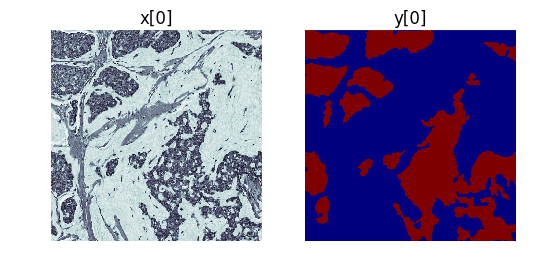

In [42]:
with h5py.File('epi.hdf5', 'r') as h5:
    X = h5['X'].value
    Y = h5['Y'].value
    ids = h5['id'].value
    
print(X.shape)

z = 0
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X[z,...], cmap='bone', interpolation='none')
plt.axis('off')
plt.title('x[%d]'% z)

plt.subplot(1,2,2)
plt.imshow(Y[z,...], interpolation='none')
plt.title('y[%d]' % z)
plt.axis('off')
plt.show()